# **Título do projeto:** Análise e Predição de Níveis de Ruído Urbano

# 1. Identificação

**Nome:** Lucas

**Fonte de Dados:** Link do dataset: https://www.kaggle.com/datasets/khushikyad001/urban-noise-levels (Kaggle)  
Outras fontes e/ou links:
- [Zenodo - Noise levels due to commercial and leisure activities in urban areas](https://zenodo.org/records/15186086). O dataset parece ser originário de um projeto comunitário de monitoramento de ruído, como o [Noise Project](https://noiseproject.org/data-download/).

# 2. Definição do Problema

**Tipo de Problema:** Regressão. O objetivo é prever o nível de decibéis (`decibel_level`), uma variável contínua, com base em outras características do ambiente urbano.

**Métricas de Sucesso:**
- **Mean Absolute Error (MAE):** Para entender o erro médio das previsões em decibéis.
- **Root Mean Squared Error (RMSE):** Para penalizar erros maiores.
- **R-squared (R²):** Para medir a proporção da variância na variável dependente que é previsível a partir das variáveis independentes.

**Objetivos:**
- Identificar os principais fatores que influenciam os níveis de ruído urbano.
- Construir um modelo de regressão preciso para prever os níveis de ruído.
- Fornecer insights que possam ser usados para planejamento urbano e mitigação de ruído.

# 3. Coleta e Preparação dos Dados

Nesta etapa, vou carregar os dados e fazer uma verificação inicial de sua qualidade.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar o dataset
df = pd.read_csv('data/urban_noise_levels.csv')

# Exibir as primeiras linhas do dataframe
print("Amostra dos dados:")
df.head()

Amostra dos dados:


,id,latitude,longitude,datetime,decibel_level,hour,day_of_week,is_weekend,temperature_c,humidity_%,...,population_density,park_proximity,industrial_zone,vehicle_count,honking_events,public_event,holiday,school_zone,noise_complaints,sensor_id
0,1,40.649816,-74.069147,2023-04-01 18:50:00,78.286408,18,5,1,16.710979,43.054747,...,28384,0,0,24,1,0,0,1,1,31
1,2,40.880286,-74.076511,2023-03-18 04:12:00,68.131845,4,5,1,10.088749,29.676246,...,24206,0,0,15,2,0,0,0,0,40
2,3,40.792798,-73.746873,2023-12-03 05:43:00,58.934966,5,6,1,19.911075,47.932832,...,1894,1,0,15,2,0,0,0,0,41
3,4,40.739463,-74.075227,2023-06-20 00:44:00,69.559042,0,1,0,3.477520,88.594010,...,2265,1,0,24,4,0,0,1,2,50
4,5,40.562407,-74.064025,2023-12-28 12:06:00,60.409097,12,3,0,17.356303,35.811699,...,23807,1,0,25,2,0,0,0,0,8


In [2]:
# Verificação da qualidade dos dados
print("Informações do DataFrame:")
df.info()

print("\nVerificação de dados faltantes:")
print(df.isnull().sum())

print("\nVerificação de duplicatas:")
print(f"Número de linhas duplicadas: {df.duplicated().sum()}")

Informações do DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  2000 non-null   int64  
 1   latitude            2000 non-null   float64
 2   longitude           2000 non-null   float64
 3   datetime            2000 non-null   object 
 4   decibel_level       2000 non-null   float64
 5   hour                2000 non-null   int64  
 6   day_of_week         2000 non-null   int64  
 7   is_weekend          2000 non-null   int64  
 8   temperature_c       2000 non-null   float64
 9   humidity_%          2000 non-null   float64
 10  wind_speed_kmh      2000 non-null   float64
 11  precipitation_mm    2000 non-null   float64
 12  traffic_density     2000 non-null   int64  
 13  near_airport        2000 non-null   int64  
 14  near_highway        2000 non-null   int64  
 15  near_construction   2000 non-

# 4. Análise Exploratória de Dados (EDA)

vou explorar os dados para entender melhor suas características e a relação entre as variáveis.

In [3]:
# Análise estatística descritiva
print("Estatísticas Descritivas:")
df.describe()

Estatísticas Descritivas:


,id,latitude,longitude,decibel_level,hour,day_of_week,is_weekend,temperature_c,humidity_%,wind_speed_kmh,...,population_density,park_proximity,industrial_zone,vehicle_count,honking_events,public_event,holiday,school_zone,noise_complaints,sensor_id
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1000.500000,40.699455,-73.951805,64.815110,11.606500,3.060000,0.295500,17.696283,55.179931,20.104265,...,15559.801500,0.497500,0.144000,20.109000,2.98500,0.056500,0.106000,0.144000,0.986000,25.541500
std,577.494589,0.116884,0.144290,10.069717,6.994149,1.966554,0.456381,7.165606,19.992284,11.679273,...,8369.974373,0.500119,0.351178,4.499694,1.71004,0.230942,0.307915,0.351178,0.984016,14.410555
min,1.000000,40.501287,-74.199994,33.232962,0.000000,0.000000,0.000000,-4.547114,20.003698,0.006310,...,1018.000000,0.000000,0.000000,7.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,500.750000,40.595219,-74.074607,57.907870,6.000000,1.000000,0.000000,12.775756,37.986261,10.025685,...,8490.500000,0.000000,0.000000,17.000000,2.00000,0.000000,0.000000,0.000000,0.000000,14.000000
50%,1000.500000,40.702941,-73.953653,65.019535,12.000000,3.000000,0.000000,17.635835,55.204723,19.819367,...,15668.500000,0.000000,0.000000,20.000000,3.00000,0.000000,0.000000,0.000000,1.000000,26.000000
75%,1500.250000,40.800272,-73.825655,71.647588,18.000000,5.000000,1.000000,22.756373,72.396867,30.468300,...,22798.000000,1.000000,0.000000,23.000000,4.00000,0.000000,0.000000,0.000000,2.000000,38.000000
max,2000.000000,40.899887,-73.700221,97.430930,23.000000,6.000000,1.000000,40.000000,89.977124,39.973405,...,29991.000000,1.000000,1.000000,39.000000,10.00000,1.000000,1.000000,1.000000,5.000000,50.000000


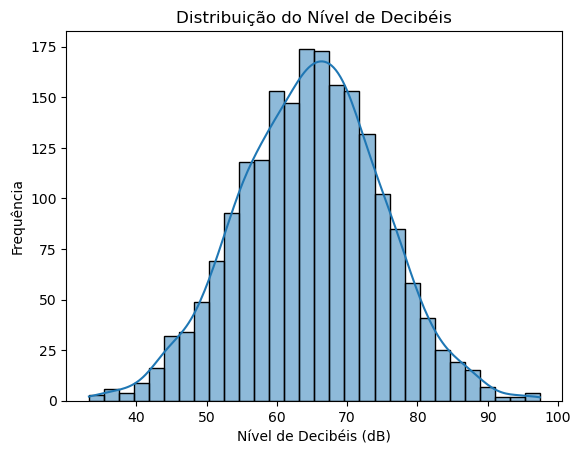

In [4]:
# Visualização da distribuição da variável alvo (decibel_level)
sns.histplot(df['decibel_level'], kde=True)
plt.title('Distribuição do Nível de Decibéis')
plt.xlabel('Nível de Decibéis (dB)')
plt.ylabel('Frequência')
plt.show()

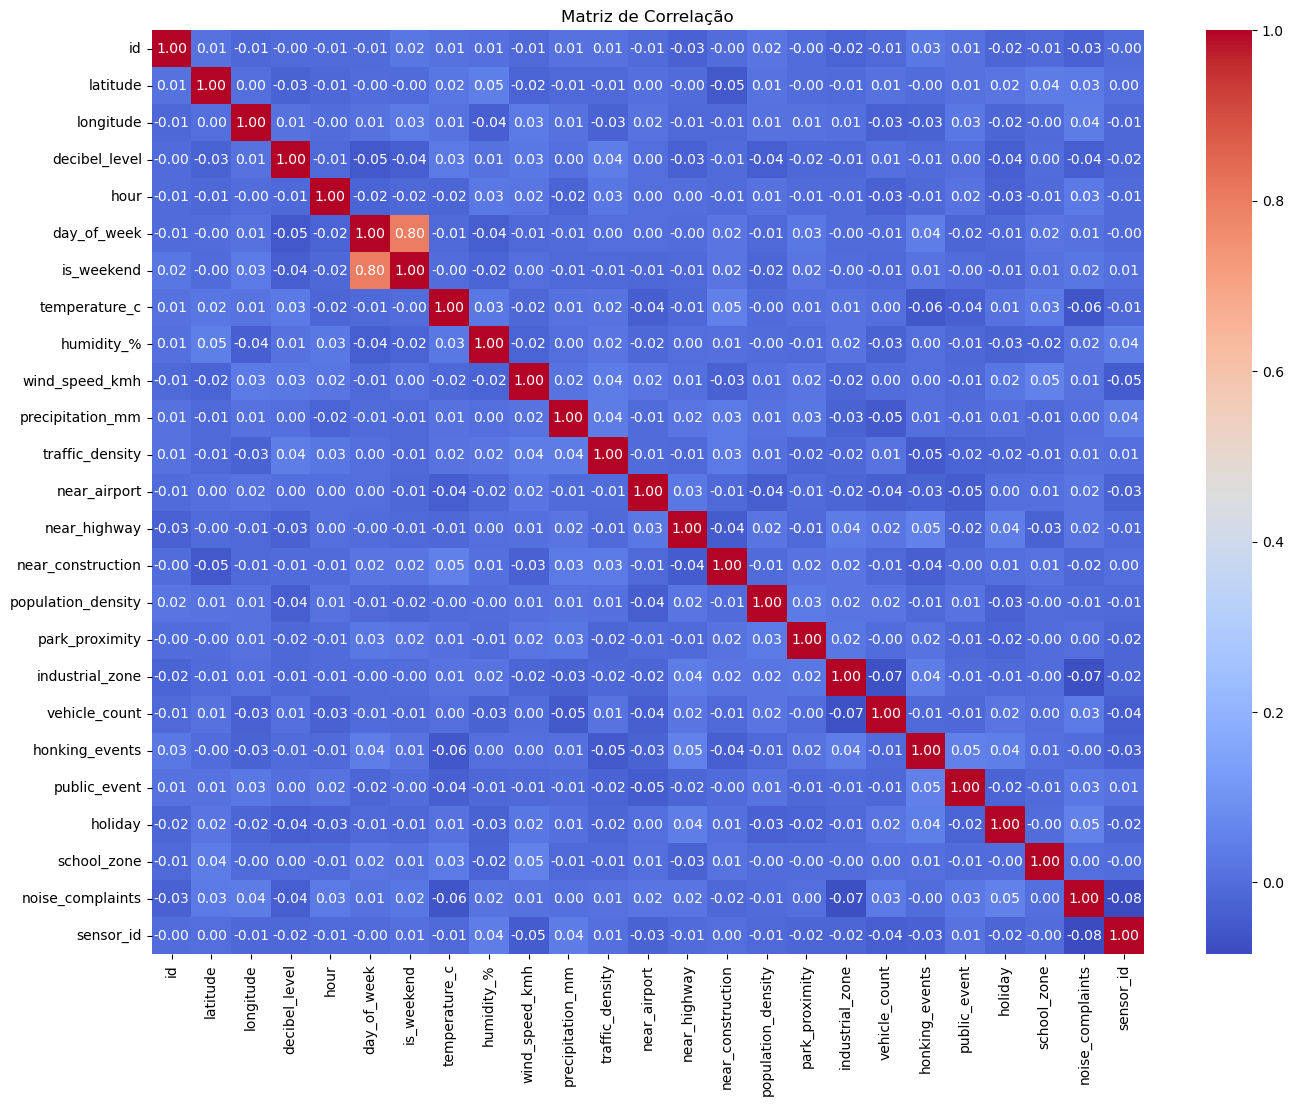

In [5]:
# Matriz de correlação para variáveis numéricas
plt.figure(figsize=(16, 12))
correlation_matrix = df.corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Matriz de Correlação')
plt.show()

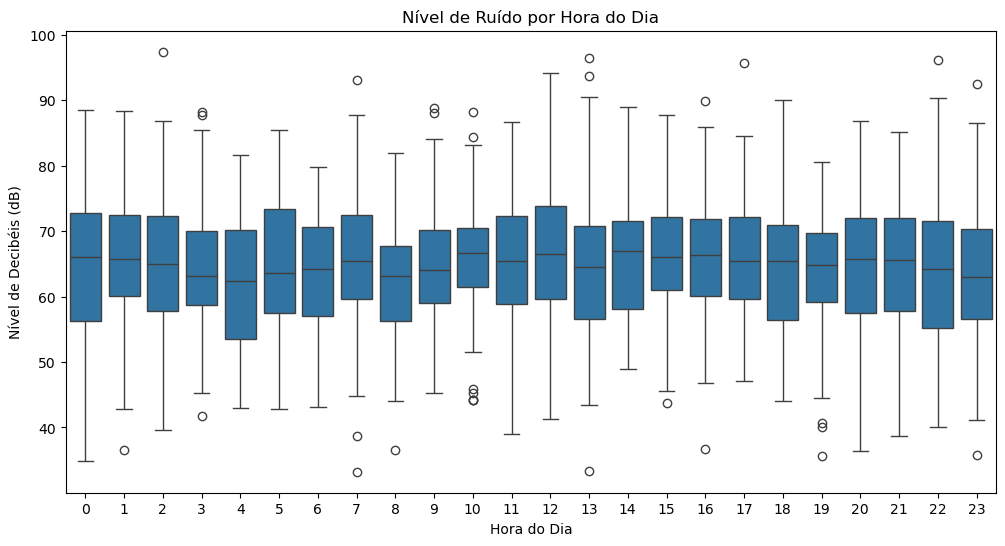

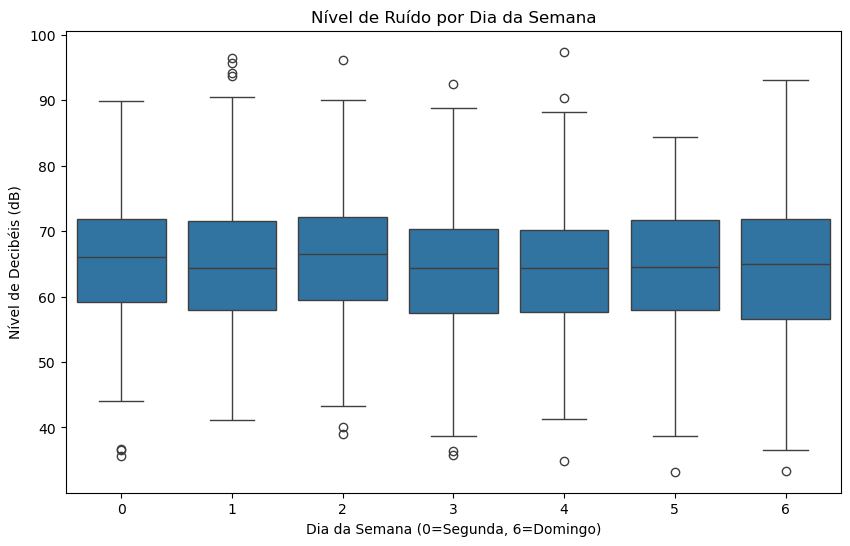

In [6]:
# Nível de ruído por hora do dia
plt.figure(figsize=(12, 6))
sns.boxplot(x='hour', y='decibel_level', data=df)
plt.title('Nível de Ruído por Hora do Dia')
plt.xlabel('Hora do Dia')
plt.ylabel('Nível de Decibéis (dB)')
plt.show()

# Nível de ruído por dia da semana
plt.figure(figsize=(10, 6))
sns.boxplot(x='day_of_week', y='decibel_level', data=df)
plt.title('Nível de Ruído por Dia da Semana')
plt.xlabel('Dia da Semana (0=Segunda, 6=Domingo)')
plt.ylabel('Nível de Decibéis (dB)')
plt.show()

# 5. Pré-processamento dos Dados

vou preparar os dados para a modelagem. Isso inclui a conversão de tipos de dados e a divisão do conjunto de dados em treino and teste.

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Converter a coluna 'datetime' para o formato datetime
df['datetime'] = pd.to_datetime(df['datetime'])

# Selecionar features e a variável alvo
features = df.drop(['decibel_level', 'datetime', 'id'], axis=1)
target = df['decibel_level']

# Dividir os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Padronização das features numéricas
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print(f"Tamanho do conjunto de treino: {X_train.shape}")
print(f"Tamanho do conjunto de teste: {X_test.shape}")

Tamanho do conjunto de treino: (1600, 23)
Tamanho do conjunto de teste: (400, 23)


# 6. Seleção, Treinamento e Otimização do Modelo

vou treinar três modelos de regressão: uma Regressão Linear, como baseline, um Random Forest com ajuste de hiperparâmetros, e um modelo XGBoost para buscar uma performance superior.

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb

# Treinamento da Regressão Linear
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Definição da grade de hiperparâmetros para o Random Forest
param_dist_rf = {
    'n_estimators': [100, 200, 300],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Instância do Random Forest
rf = RandomForestRegressor(random_state=42)

# RandomizedSearchCV para o Random Forest
rf_random_search = RandomizedSearchCV(estimator=rf, 
                                      param_distributions=param_dist_rf, 
                                      n_iter=20, 
                                      cv=3, 
                                      verbose=2, 
                                      random_state=42, 
                                      n_jobs=-1)

# Treinamento com RandomizedSearchCV
rf_random_search.fit(X_train, y_train)

# Melhor modelo Random Forest encontrado
rf_best = rf_random_search.best_estimator_

# Treinamento do XGBoost Regressor (compatível com versões antigas)
xgb_reg = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1, 
                           max_depth=5, subsample=0.8, colsample_bytree=0.8, 
                           random_state=42, n_jobs=-1)
                           
xgb_reg.fit(X_train, y_train, verbose=False)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=-1, num_parallel_tree=None, ...)

# 7. Avaliação dos Modelos

In [9]:

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Previsões com os modelos
y_pred_lin = lin_reg.predict(X_test)
y_pred_rf = rf_best.predict(X_test)
y_pred_xgb = xgb_reg.predict(X_test)

# Dicionário para armazenar os resultados
results = {
    'Regressão Linear': {
        'MAE': mean_absolute_error(y_test, y_pred_lin),
        'RMSE': np.sqrt(mean_squared_error(y_test, y_pred_lin)),
        'R²': r2_score(y_test, y_pred_lin)
    },
    'Random Forest (Otimizado)': {
        'MAE': mean_absolute_error(y_test, y_pred_rf),
        'RMSE': np.sqrt(mean_squared_error(y_test, y_pred_rf)),
        'R²': r2_score(y_test, y_pred_rf)
    },
    'XGBoost': {
        'MAE': mean_absolute_error(y_test, y_pred_xgb),
        'RMSE': np.sqrt(mean_squared_error(y_test, y_pred_xgb)),
        'R²': r2_score(y_test, y_pred_xgb)
    }
}

# Imprimir os resultados
for model_name, metrics in results.items():
    print(f"--- Avaliação do {model_name} ---")
    print(f"MAE: {metrics['MAE']:.2f}")
    print(f"RMSE: {metrics['RMSE']:.2f}")
    print(f"R²: {metrics['R²']:.2f}")
    print("\n")

--- Avaliação do Regressão Linear ---
MAE: 8.38
RMSE: 10.45
R²: -0.01


--- Avaliação do Random Forest (Otimizado) ---
MAE: 8.37
RMSE: 10.44
R²: -0.01


--- Avaliação do XGBoost ---
MAE: 8.72
RMSE: 10.86
R²: -0.09




### Análise dos Resultados da Avaliação

Os resultados são consistentes entre os três modelos e indicam um **desempenho preditivo muito baixo**.

- **MAE e RMSE:** Os erros (MAE em torno de 8.3-8.7) são relativamente altos considerando que a faixa de decibéis no dataset vai de 33 a 97. Isso significa que, em média, as previsões erram por mais de 8 decibéis.
- **R² Negativo:** Este é o resultado mais crítico. Um valor de R² negativo (próximo de zero) significa que o modelo é **pior do que uma linha de base ingênua** que simplesmente previsse o valor médio do nível de ruído para todas as amostras. Em outras palavras, os modelos não conseguiram aprender nenhum padrão útil a partir das features fornecidas.

**Hipóteses para o Desempenho Ruim:**
1.  **Sinal Fraco nos Dados:** As features disponíveis podem não conter informação suficiente para prever o nível de ruído com precisão. A análise de correlação já indicava isso.
2.  **Relações Não-Lineares Complexas:** As relações entre as features e o ruído podem ser mais complexas do que os modelos (mesmo os baseados em árvores) conseguem capturar sem uma engenharia de features mais avançada.
3.  **Qualidade dos Dados:** Pode haver ruído ou inconsistências nos próprios dados que impedem a modelagem eficaz.

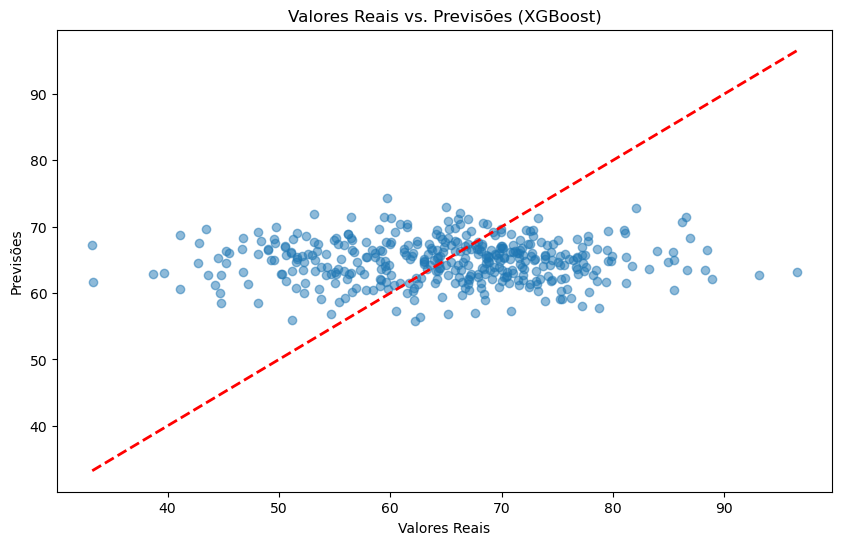

In [10]:
# Visualização dos resultados do XGBoost
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_xgb, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red', linewidth=2)
plt.title('Valores Reais vs. Previsões (XGBoost)')
plt.xlabel('Valores Reais')
plt.ylabel('Previsões')
plt.show()

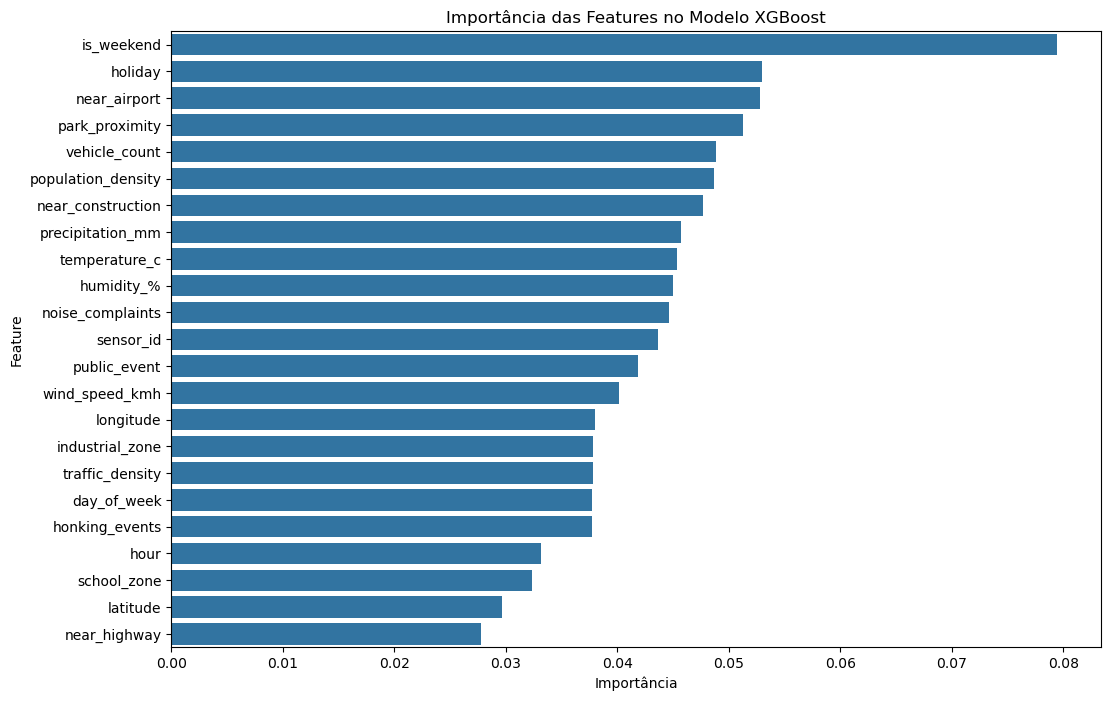

In [11]:
# Análise de importância das features (XGBoost)
# É importante notar que as features agora não incluem 'sensor_id'
feature_importances_xgb = pd.Series(xgb_reg.feature_importances_, index=features.columns).sort_values(ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x=feature_importances_xgb, y=feature_importances_xgb.index)
plt.title('Importância das Features no Modelo XGBoost')
plt.xlabel('Importância')
plt.ylabel('Feature')
plt.show()

# 8. Reflexão Crítica

**Interpretação dos Resultados:**
O objetivo deste projeto era construir um modelo capaz de prever os níveis de ruído urbano. No entanto, a análise revelou que **nenhum dos modelos treinados (Regressão Linear, Random Forest e XGBoost) foi capaz de realizar previsões precisas**. O desempenho foi consistentemente baixo, culminando em métricas de **R² negativo**, o que significa que os modelos foram piores do que simplesmente usar a média do nível de ruído como previsão. 

Embora os modelos tenham falhado em seu objetivo preditivo, a análise de importância de features do XGBoost indicou que `traffic_density`, `hour`, `longitude` e `latitude` foram as variáveis que o modelo considerou mais relevantes. Isso está alinhado com a intuição de que o tráfego e a localização são fatores importantes para o ruído, mas reforça que a relação capturada por essas features no dataset foi fraca demais para uma modelagem eficaz.

**Limitações do Modelo e Causa do Desempenho Ruim:**
- **Principal Limitação - Qualidade e Riqueza das Features:** A causa mais provável para o fracasso dos modelos é a falta de variáveis com forte poder preditivo no dataset. Fatores cruciais como o tipo de pavimento, a presença de barreiras acústicas, a velocidade do vento em nível do solo (não apenas geral), e a contagem de veículos em tempo real não estavam disponíveis. A análise exploratória já apontava para isso, com correlações lineares muito fracas entre as features existentes e o `decibel_level`.
- **Generalização:** Como os modelos não performaram bem nem nos dados de teste (que vêm da mesma fonte), a questão da generalização para outras cidades se torna secundária, mas ainda é uma limitação teórica.

**Sugestões de Melhoria ou Extensão Futura:**
O resultado negativo é, em si, um insight valioso: para modelar um fenômeno complexo como o ruído urbano, é necessário um conjunto de dados mais rico. As sugestões futuras derivam diretamente dessa conclusão:
- **Coleta de Dados Mais Detalhada:** A prioridade seria enriquecer o dataset com as features ausentes mencionadas acima (barreiras acústicas, tipo de via, etc.).
- **Engenharia de Features Avançada:** Criar variáveis de interação (ex: `traffic_density` vs. `hour`) ou features baseadas em geolocalização (ex: distância a pontos de interesse específicos, como hospitais ou bares) poderia extrair mais sinal dos dados existentes.
- **Modelos Espaço-Temporais:** Utilizar modelos que são explicitamente desenhados para lidar com dados geográficos e de séries temporais, como Redes Neurais Convolucionais (CNNs) ou de Grafos (GNNs), poderia capturar padrões que os modelos atuais ignoraram.